In [ ]:
!python -m pip install -U matplotlib

     |████████████████████████████████| 11.2 MB 11.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#groupedvalues=df.groupby('day', 'time').sum('total_bill').reset_index()
groupedvalues = pd.pivot_table(df,index=['time','sex']).reset_index()
groupedvalues.head()

,time,sex,size,tip,total_bill
0,Lunch,Male,2.363636,2.882121,18.048485
1,Lunch,Female,2.457143,2.582857,16.339143
2,Dinner,Male,2.701613,3.144839,21.461452
3,Dinner,Female,2.461538,3.002115,19.213077


In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

pal = sns.color_palette("Blues", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
g=sns.barplot(x='time',y='tip',data=groupedvalues, hue='sex', palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.time, round(row.tip), color='black', ha="center", fontdict={'fontsize': 10, 'horizontalalignment': 'center','fontweight':'bold'})

plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tips by Day", y=1.1, fontdict={'fontsize': 24, 'horizontalalignment': 'center','fontweight':'bold'})
sns.despine(bottom = True, left = True)
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


ConversionError: ignored

<Figure size 720x360 with 1 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


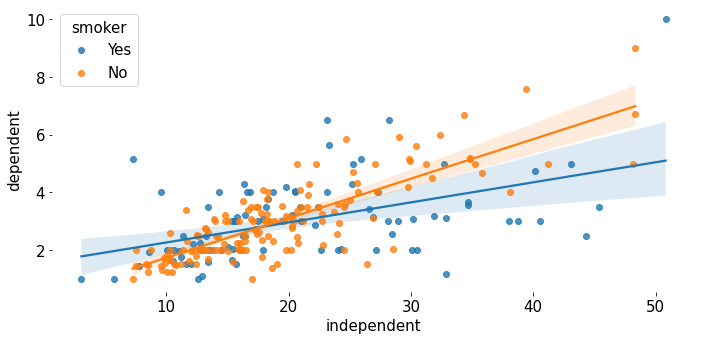

In [ ]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

Data = sns.load_dataset("tips")
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data = Data, legend_out = False, aspect = 2)
g.set(xlabel = "independent", ylabel = "dependent")
# sns.despine(fig=None, ax=None, top=False, right=True, left=True, bottom=True, offset=None, trim=False)
# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()


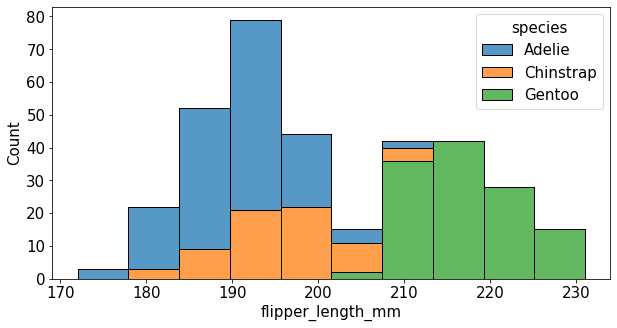

In [ ]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

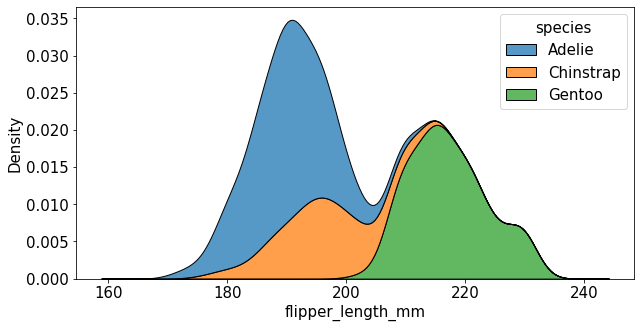

In [ ]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

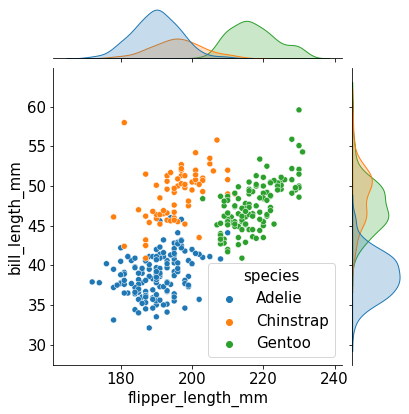

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")